<a href="https://colab.research.google.com/github/mayank-liv/German-traffic-sign-recognition/blob/master/German_traffic_sign_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Traffic Sign Recognition Model

## The first step involves importing the libraries and loading the dataset, as is done in the following steps -

In [0]:
#Importing all the libraries

import numpy as np 
import pandas as pd 

import os

import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from PIL import Image

import random
import time
from skimage import io, transform

from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,Dropout
from keras.models import Model, load_model,Sequential
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
#from resnets_utils import *
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow

from keras import optimizers
from keras.optimizers import SGD
#K.set_image_data_format('channels_first')
import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
!unzip '/content/drive/My Drive/gtsrb-german-traffic-sign.zip'

Archive:  /content/drive/My Drive/gtsrb-german-traffic-sign.zip
replace Train.tar? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Meta.tar? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Meta.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [11]:
!tar -xvf /content/Train.tar

./
./0/
./0/00000_00000_00000.png
./0/00000_00000_00001.png
./0/00000_00000_00002.png
./0/00000_00000_00003.png
./0/00000_00000_00004.png
./0/00000_00000_00005.png
./0/00000_00000_00006.png
./0/00000_00000_00007.png
./0/00000_00000_00008.png
./0/00000_00000_00009.png
./0/00000_00000_00010.png
./0/00000_00000_00011.png
./0/00000_00000_00012.png
./0/00000_00000_00013.png
./0/00000_00000_00014.png
./0/00000_00000_00015.png
./0/00000_00000_00016.png
./0/00000_00000_00017.png
./0/00000_00000_00018.png
./0/00000_00000_00019.png
./0/00000_00000_00020.png
./0/00000_00000_00021.png
./0/00000_00000_00022.png
./0/00000_00001_00004.png
./0/00000_00001_00005.png
./0/00000_00001_00006.png
./0/00000_00001_00007.png
./0/00000_00001_00008.png
./0/00000_00001_00009.png
./0/00000_00001_00010.png
./0/00000_00001_00011.png
./0/00000_00001_00012.png
./0/00000_00001_00013.png
./0/00000_00001_00014.png
./0/00000_00001_00015.png
./0/00000_00001_00016.png
./0/00000_00001_00017.png
./0/00000_00001_00018.png
./0/

## We convert the individual images into an array of images. 

In [0]:
#Make a list of images, and their labels


def load_images(path):
    images = []                                        #Images list
    labels = []                                        #Labels list
    classes = [i for i in range(43)]
    for new_class in classes:
        new_path = path + str(new_class) + "/"
        file_names = [os.path.join(new_path, f)
                      for f in os.listdir(new_path)]
        
        for file in file_names:
            images.append(io.imread(file))
            labels.append(new_class)
    
    return images, labels


train_images, train_labels = load_images("../content/")       #Returns 2 lists of training images, and their labels

In [13]:
len(train_images)

39209

In [14]:
!tar -xvf /content/Test.tar

./
./00000.png
./00001.png
./00002.png
./00003.png
./00004.png
./00005.png
./00006.png
./00007.png
./00008.png
./00009.png
./00010.png
./00011.png
./00012.png
./00013.png
./00014.png
./00015.png
./00016.png
./00017.png
./00018.png
./00020.png
./00021.png
./00022.png
./00023.png
./00024.png
./00025.png
./00026.png
./00027.png
./00028.png
./00029.png
./00030.png
./00031.png
./00032.png
./00033.png
./00034.png
./00035.png
./00036.png
./00037.png
./00038.png
./00040.png
./00041.png
./00042.png
./00043.png
./00044.png
./00045.png
./00046.png
./00047.png
./00048.png
./00049.png
./00050.png
./00051.png
./00052.png
./00053.png
./00054.png
./00055.png
./00056.png
./00057.png
./00058.png
./00060.png
./00061.png
./00062.png
./00063.png
./00064.png
./00065.png
./00066.png
./00067.png
./00068.png
./00069.png
./00070.png
./00071.png
./00072.png
./00073.png
./00074.png
./00075.png
./00076.png
./00077.png
./00078.png
./00080.png
./00081.png
./00082.png
./00083.png
./00084.png
./00085.png
./00086.png
.

In [0]:
#Make a list of Test Data

test_data = pd.read_csv("../content/Test.csv")       
test_labels = test_data['ClassId'].values
paths = test_data['Path'].values


def load_test_images(paths):
    images=[]                            #List of test images
    for f in paths:
        image = io.imread('../content/' + f.replace('Test/', ''))
        images.append(image)
    return images

test_images = load_test_images(paths)            #Returns a list of the test images

In [0]:
#Convert the lists into arrays and print their length

train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

n_classes=43



In [17]:
#Print lenths of different arrays


print("Length of train images is " + str(train_images.shape))
print("Length of train labels is " + str(train_labels.shape))
print("Length of test images is " + str(test_images.shape))
print("Length of test labels is " + str(test_labels.shape))
print("Length of classes is " + str(n_classes))

Length of train images is (39209,)
Length of train labels is (39209,)
Length of test images is (12630,)
Length of test labels is (12630,)
Length of classes is 43


## Inorder to have a better idea about the images we are using, we print them

Here are a few training images


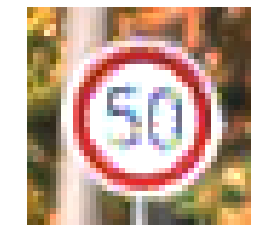

Image Size = (38, 39, 3)
Image Class = 2


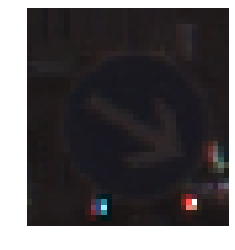

Image Size = (41, 38, 3)
Image Class = 38


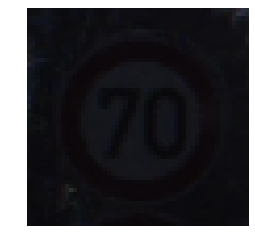

Image Size = (52, 53, 3)
Image Class = 4


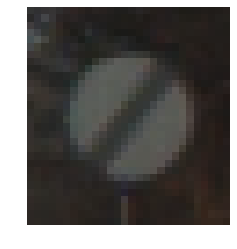

Image Size = (30, 28, 3)
Image Class = 32


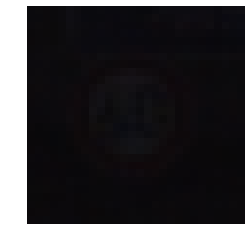

Image Size = (28, 28, 3)
Image Class = 3


In [18]:
# Function to print a certain number of random images

def print_images(images, labels, n_images): 
# images is the array of iamges from which image is to be printed
# labels is the array of labels of the images 
# n_images is the number of images that are to be printed
    for i in range(n_images):
        index_img = int(random.random() * len(images))
        plt.axis('off')
        plt.imshow(images[index_img])
        plt.show()
        
        print("Image Size = " + str(images[index_img].shape))
        print("Image Class = " + str(labels[index_img]))

        
print("Here are a few training images")
print_images(train_images, train_labels, 5)

Here are a few images from the testing dataset


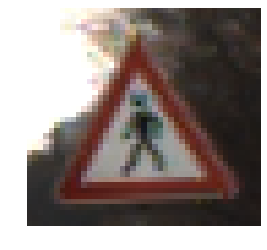

Image Size = (40, 43, 3)
Image Class = 27


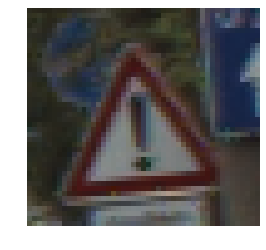

Image Size = (44, 47, 3)
Image Class = 18


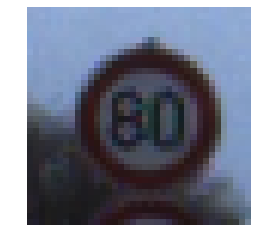

Image Size = (36, 37, 3)
Image Class = 5


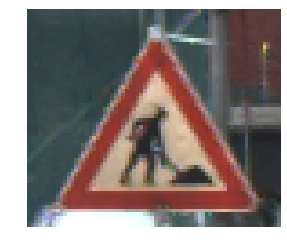

Image Size = (60, 70, 3)
Image Class = 25


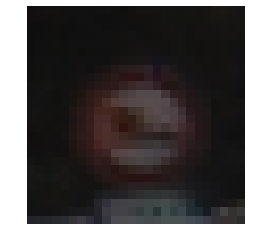

Image Size = (26, 26, 3)
Image Class = 10


In [19]:
#Print a few images from the testing dataset

print("Here are a few images from the testing dataset")
print_images(test_images, test_labels, 5)

## Finally, we design the model

In [0]:
# Resize the images, so that they will work better when we train them

def resize_images(images, new_size):  #Function to return an array of resized images
    
    new_images = np.array([transform.resize(image, new_size) for image in images])
    return new_images

train_images = resize_images(train_images, (48, 48))
test_images = resize_images(test_images, (48, 48))

train_images /= 255
test_images /= 255

In [21]:
train_labels.reshape((39209, 1))

array([[ 0],
       [ 0],
       [ 0],
       ...,
       [42],
       [42],
       [42]])

In [22]:
#Print shapes of different arrays


print("Shape of train images is " + str(train_images.shape))
print("Śhape of train labels is " + str(train_labels.shape))
print("Shape of test images is " + str(test_images.shape))
print("Shape of test labels is " + str(test_labels.shape))

Shape of train images is (39209, 48, 48, 3)
Śhape of train labels is (39209,)
Shape of test images is (12630, 48, 48, 3)
Shape of test labels is (12630,)


In [0]:
# Design the model


classifier=Sequential()

#print(X_train.shape)
classifier.add(Conv2D(8,(3,3),padding='Same',activation='relu',kernel_initializer=glorot_uniform(seed=0),input_shape=[48,48,3]))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D((2,2),strides=(1,1)))
classifier.add(Dropout(0.4))
#print(X_train.shape)
#classifier.add(Conv2D(8,(3,3),padding='Same',activation='relu',kernel_initializer=glorot_uniform(seed=0)))
#classifier.add(BatchNormalization())
#classifier.add(MaxPooling2D((2,2),strides=(1,1)))
#classifier.add(Dropout(0.4))
#print(X_train.shape)               
classifier.add(Conv2D(16,(3,3),padding='Valid',activation='relu',kernel_initializer=glorot_uniform(seed=0)))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D((2,2),strides=(1,1)))     
classifier.add(Dropout(0.4))
#print(X_train.shape)               
#classifier.add(Conv2D(16,(3,3),padding='Valid',activation='relu',kernel_initializer=glorot_uniform(seed=0)))
#classifier.add(BatchNormalization())
#classifier.add(MaxPooling2D((2,2),strides=(1,1)))               
#classifier.add(Dropout(0.4))
#print(X_train.shape)               
classifier.add(Flatten())               
#classifier.add(Dense(1024,activation='relu',kernel_initializer=glorot_uniform(seed=0)))
#classifier.add(Dropout(0.4))
#classifier.add(Dense(512,activation='relu',kernel_initializer=glorot_uniform(seed=0)))
#classifier.add(Dropout(0.4))
#classifier.add(Dense(256,activation='relu',kernel_initializer=glorot_uniform(seed=0)))
#classifier.add(Dense(128,activation='relu',kernel_initializer=glorot_uniform(seed=0)))
#classifier.add(Dense(64,activation='relu',kernel_initializer=glorot_uniform(seed=0)))
#classifier.add(Dense(32,activation='relu',kernel_initializer=glorot_uniform(seed=0)))               
#classifier.add(Dense(10,activation='relu',kernel_initializer=glorot_uniform(seed=0)))
classifier.add(Dense(n_classes, activation='softmax', kernel_initializer=glorot_uniform(seed=0)))

In [35]:
# Designing the model

Y_=train_labels.reshape(-1,1)

from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(handle_unknown="ignore")
Y_train=enc.fit_transform(Y_).toarray()
Y_train.shape

(39209, 43)

In [0]:
# Shuffling the dataset

from  sklearn.utils import shuffle

X_train, Y_train = shuffle(train_images, Y_train, random_state=0)

In [37]:
from keras import optimizers
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [44]:
classifier.fit(X_train,Y_train,epochs=50,batch_size=512,validation_split=0.2)

Train on 31367 samples, validate on 7842 samples
Epoch 1/50
31367/31367 [==============================] - 4s 121us/step - loss: 0.1020 - acc: 0.9732 - val_loss: 0.2308 - val_acc: 0.9490
Epoch 2/50
31367/31367 [==============================] - 4s 118us/step - loss: 0.0949 - acc: 0.9742 - val_loss: 0.2631 - val_acc: 0.9464
Epoch 3/50
31367/31367 [==============================] - 4s 119us/step - loss: 0.0913 - acc: 0.9747 - val_loss: 0.2579 - val_acc: 0.9486
Epoch 4/50
31367/31367 [==============================] - 4s 118us/step - loss: 0.0901 - acc: 0.9753 - val_loss: 0.2321 - val_acc: 0.9503
Epoch 5/50
31367/31367 [==============================] - 4s 118us/step - loss: 0.0909 - acc: 0.9758 - val_loss: 0.2559 - val_acc: 0.9472
Epoch 6/50
31367/31367 [==============================] - 4s 119us/step - loss: 0.0908 - acc: 0.9757 - val_loss: 0.2199 - val_acc: 0.9545
Epoch 7/50
31367/31367 [==============================] - 4s 119us/step - loss: 0.0844 - acc: 0.9776 - val_loss: 0.2471 - v

In [0]:
classifier.save("../content/model1.h5")

## Testing the designed model, on the test data

In [0]:
Y1=test_labels.reshape(-1,1)

from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(handle_unknown="ignore")
Y_test=enc.fit_transform(Y1).toarray()

In [45]:
loss,accuracy=classifier.evaluate(test_images,Y_test)
print("The accuracy of the model for the test set is", accuracy)

12630/12630 [==============================] - 1s 98us/step
The accuracy of the model for the test set is 0.8539192398672338


In [47]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 8)         224       
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 8)         32        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 47, 47, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 16)        1168      
_________________________________________________________________
batch_normalization_2 (Batch (None, 45, 45, 16)        64        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 44, 44, 16)       